In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy import stats

In [23]:
df = pd.read_csv('/kaggle/input/confer-extension-results/Part4B/Llama/part4b_type4_llama_results.csv', index_col=0)
df

,premise,hypothesis,gold_label,trigger,key_phrase,type,predicted_label,expected_logits,attr_result,word_gradients,average_gradient,trigger_gradient,trigger_word_ranking,trigger_word_percentile_ranking
0,"If Liam is an aerospace engineer, he'll test t...",Liam has a wind tunnel.,E,possessive,his wind tunnel,related,E,"[0, 0, 1]","{'tokens': ['If', 'ĠLiam', 'Ġis', 'Ġan', 'Ġaer...","{'If': 1.275778777198866e-05, 'Liam': 0.003695...",0.001006,0.000006,11.0,0.578947
1,"If Bill is a content strategist, he'll manage ...",Bill has a content management application.,E,possessive,his content management application,related,E,"[0, 0, 1]","{'tokens': ['If', 'ĠBill', 'Ġis', 'Ġa', 'Ġcont...","{'If': 0.0002884181449189782, 'Bill': -0.00902...",-0.000913,-0.001930,1.0,0.062500
2,"If Steve is a conservation officer, he'll set ...",Steve has a wildlife trap.,E,possessive,his wildlife trap,related,E,"[0, 0, 1]","{'tokens': ['If', 'ĠSteve', 'Ġis', 'Ġa', 'Ġcon...","{'If': 0.0006778022507205606, 'Steve': -0.0047...",0.000426,-0.001805,19.0,0.863636
3,"If Matt is a scuba diver, he'll bring his wets...",Matt has a wetsuit.,E,possessive,his wetsuit,related,E,"[0, 0, 1]","{'tokens': ['If', 'ĠMatt', 'Ġis', 'Ġa', 'Ġsc',...","{'If': 0.00021063859458081424, 'Matt': 0.00683...",0.000823,0.000054,14.0,0.875000
4,"If Noah is a pastry chef, he'll pipe frosting ...",Noah has a pastry bag.,E,possessive,his pastry bag,related,E,"[0, 0, 1]","{'tokens': ['If', 'ĠNoah', 'Ġis', 'Ġa', 'Ġpast...","{'If': -0.00021201802883297205, 'Noah': 0.0004...",-0.000559,-0.003081,10.0,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,"If Christina is a makeup artist, John's friend...",Christina has a makeup sponge.,N,possessive,John's friend,unrelated,E,"[0, 1, 0]","{'tokens': ['If', 'ĠChristina', 'Ġis', 'Ġa', '...","{'If': -0.006060554645955563, 'Christina': -0....",-0.000806,0.000901,13.0,0.650000
293,"If Rahim is a clergyman, John's friend will ca...",Rahim has a holy book.,N,possessive,John's friend,unrelated,E,"[0, 1, 0]","{'tokens': ['If', 'ĠRah', 'im', 'Ġis', 'Ġa', '...","{'If': 0.003309460822492838, 'Rahim': -0.00365...",-0.000398,0.000190,13.0,0.565217
294,"If James is a police officer, John's friend wi...",James has a gun.,N,possessive,John's friend,unrelated,E,"[0, 1, 0]","{'tokens': ['If', 'ĠJames', 'Ġis', 'Ġa', 'Ġpol...","{'If': 0.009487573988735676, 'James': -0.00124...",0.000974,-0.000494,5.0,0.312500
295,"If Maya is a piano teachis, John's friend will...",Maya has a metronome.,N,possessive,John's friend,unrelated,E,"[0, 1, 0]","{'tokens': ['If', 'ĠMaya', 'Ġis', 'Ġa', 'Ġpian...","{'If': -0.0006583930226042867, 'Maya': -0.0030...",-0.000215,0.003966,11.0,0.578947


In [24]:
df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
df

,premise,hypothesis,gold_label,trigger,key_phrase,type,predicted_label,expected_logits,attr_result,word_gradients,average_gradient,trigger_gradient,trigger_word_ranking,trigger_word_percentile_ranking,Trigger IG / Avg. IG
0,"If Liam is an aerospace engineer, he'll test t...",Liam has a wind tunnel.,E,possessive,his wind tunnel,related,E,"[0, 0, 1]","{'tokens': ['If', 'ĠLiam', 'Ġis', 'Ġan', 'Ġaer...","{'If': 1.275778777198866e-05, 'Liam': 0.003695...",0.001006,0.000006,11.0,0.578947,0.005735
1,"If Bill is a content strategist, he'll manage ...",Bill has a content management application.,E,possessive,his content management application,related,E,"[0, 0, 1]","{'tokens': ['If', 'ĠBill', 'Ġis', 'Ġa', 'Ġcont...","{'If': 0.0002884181449189782, 'Bill': -0.00902...",-0.000913,-0.001930,1.0,0.062500,2.114453
2,"If Steve is a conservation officer, he'll set ...",Steve has a wildlife trap.,E,possessive,his wildlife trap,related,E,"[0, 0, 1]","{'tokens': ['If', 'ĠSteve', 'Ġis', 'Ġa', 'Ġcon...","{'If': 0.0006778022507205606, 'Steve': -0.0047...",0.000426,-0.001805,19.0,0.863636,-4.236425
3,"If Matt is a scuba diver, he'll bring his wets...",Matt has a wetsuit.,E,possessive,his wetsuit,related,E,"[0, 0, 1]","{'tokens': ['If', 'ĠMatt', 'Ġis', 'Ġa', 'Ġsc',...","{'If': 0.00021063859458081424, 'Matt': 0.00683...",0.000823,0.000054,14.0,0.875000,0.065505
4,"If Noah is a pastry chef, he'll pipe frosting ...",Noah has a pastry bag.,E,possessive,his pastry bag,related,E,"[0, 0, 1]","{'tokens': ['If', 'ĠNoah', 'Ġis', 'Ġa', 'Ġpast...","{'If': -0.00021201802883297205, 'Noah': 0.0004...",-0.000559,-0.003081,10.0,0.625000,5.516067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,"If Christina is a makeup artist, John's friend...",Christina has a makeup sponge.,N,possessive,John's friend,unrelated,E,"[0, 1, 0]","{'tokens': ['If', 'ĠChristina', 'Ġis', 'Ġa', '...","{'If': -0.006060554645955563, 'Christina': -0....",-0.000806,0.000901,13.0,0.650000,-1.118474
293,"If Rahim is a clergyman, John's friend will ca...",Rahim has a holy book.,N,possessive,John's friend,unrelated,E,"[0, 1, 0]","{'tokens': ['If', 'ĠRah', 'im', 'Ġis', 'Ġa', '...","{'If': 0.003309460822492838, 'Rahim': -0.00365...",-0.000398,0.000190,13.0,0.565217,-0.477126
294,"If James is a police officer, John's friend wi...",James has a gun.,N,possessive,John's friend,unrelated,E,"[0, 1, 0]","{'tokens': ['If', 'ĠJames', 'Ġis', 'Ġa', 'Ġpol...","{'If': 0.009487573988735676, 'James': -0.00124...",0.000974,-0.000494,5.0,0.312500,-0.506707
295,"If Maya is a piano teachis, John's friend will...",Maya has a metronome.,N,possessive,John's friend,unrelated,E,"[0, 1, 0]","{'tokens': ['If', 'ĠMaya', 'Ġis', 'Ġa', 'Ġpian...","{'If': -0.0006583930226042867, 'Maya': -0.0030...",-0.000215,0.003966,11.0,0.578947,-18.487696


In [25]:
orig_data = df[df['type'] == 'related']['Trigger IG / Avg. IG']
new_data = df[df['type'] != 'related']['Trigger IG / Avg. IG']

In [26]:
def get_mean_ci(data):
    mean = np.mean(data)
    sem = stats.sem(data)
    ci = stats.t.interval(0.95, len(data)-1, loc=mean, scale=sem) 
    return mean, ci 

In [27]:
tigger_ratios = df['Trigger IG / Avg. IG']
mean = np.mean(tigger_ratios)
sem = stats.sem(tigger_ratios)
ci = stats.t.interval(0.95, len(tigger_ratios)-1, loc=mean, scale=sem)
ci

(-29.41744757649017, 71.90252435204178)

In [28]:
orig_mean, orig_ci = get_mean_ci(orig_data)
new_mean, new_ci = get_mean_ci(new_data)

In [30]:
orig_means = {}
new_means = {}
orig_cis = {}
new_cis = {}

In [31]:
# RoBERTa
model_name = 'RoBERTa'
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4B_New/{model_name}/part4b_type4_{model_name.lower()}_results_new.csv', index_col=0)
df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
orig_data = df[df['type'] == 'related']['Trigger IG / Avg. IG']
new_data = df[df['type'] != 'related']['Trigger IG / Avg. IG']
orig_means[model_name], orig_cis[model_name] = get_mean_ci(orig_data)
new_means[model_name], new_cis[model_name] = get_mean_ci(new_data)

In [32]:
model_name = 'DeBERTa'
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4B_New/{model_name}/part4b_type4_{model_name.lower()}_results_new.csv', index_col=0)
df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
orig_data = df[df['type'] == 'related']['Trigger IG / Avg. IG']
new_data = df[df['type'] != 'related']['Trigger IG / Avg. IG']
orig_means[model_name], orig_cis[model_name] = get_mean_ci(orig_data)
new_means[model_name], new_cis[model_name] = get_mean_ci(new_data)

In [33]:
model_name = 'Llama'
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4B_New/{model_name}/part4b_type4_{model_name.lower()}_results_new.csv', index_col=0)
df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
orig_data = df[df['type'] == 'related']['Trigger IG / Avg. IG']
new_data = df[df['type'] != 'related']['Trigger IG / Avg. IG']
orig_means[model_name], orig_cis[model_name] = get_mean_ci(orig_data)
new_means[model_name], new_cis[model_name] = get_mean_ci(new_data)

In [34]:
model_name = 'Gemma'
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4B_New/{model_name}/part4b_type4_{model_name.lower()}_results.csv', index_col=0)
df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
orig_data = df[df['type'] == 'related']['Trigger IG / Avg. IG']
new_data = df[df['type'] != 'related']['Trigger IG / Avg. IG']
orig_means[model_name], orig_cis[model_name] = get_mean_ci(orig_data)
new_means[model_name], new_cis[model_name] = get_mean_ci(new_data)

In [35]:
orig_means

{'RoBERTa': 14.260203754437821,
 'DeBERTa': 0.38129875673484864,
 'Llama': -2.286805160377974,
 'Gemma': 1.0280145825460365}

In [36]:
orig_cis

{'RoBERTa': (12.079391115449098, 16.441016393426544),
 'DeBERTa': (0.35053356513041906, 0.41206394833927823),
 'Llama': (-9.745988974404895, 5.172378653648947),
 'Gemma': (-0.19170338797096464, 2.2477325530630377)}

In [37]:
new_means

{'RoBERTa': 13.09625127494244,
 'DeBERTa': 0.36586873738642384,
 'Llama': 33.58355364323542,
 'Gemma': 1.8880544197169025}

In [38]:
pd.concat([pd.DataFrame(orig_means,index=['Trigger IG Ratio']),pd.DataFrame(new_means,index=['Trigger IG Ratio'])])

,RoBERTa,DeBERTa,Llama,Gemma
Trigger IG Ratio,14.260204,0.381299,-2.286805,1.028015
Trigger IG Ratio,13.096251,0.365869,33.583554,1.888054


In [39]:
orig_cis

{'RoBERTa': (12.079391115449098, 16.441016393426544),
 'DeBERTa': (0.35053356513041906, 0.41206394833927823),
 'Llama': (-9.745988974404895, 5.172378653648947),
 'Gemma': (-0.19170338797096464, 2.2477325530630377)}

In [40]:
new_cis

{'RoBERTa': (11.647872143148843, 14.544630406736035),
 'DeBERTa': (0.34932868084857555, 0.38240879392427213),
 'Llama': (-42.44135018980292, 109.60845747627376),
 'Gemma': (0.6198868490590845, 3.1562219903747204)}

In [41]:
xtick_labels = []
for model_name in orig_means.keys():
    xtick_labels.extend([f'{model_name} \n Type 4 \n Original', f'{model_name} \n Type 4 \n New'])
xtick_labels

['RoBERTa \n Type 4 \n Original',
 'RoBERTa \n Type 4 \n New',
 'DeBERTa \n Type 4 \n Original',
 'DeBERTa \n Type 4 \n New',
 'Llama \n Type 4 \n Original',
 'Llama \n Type 4 \n New',
 'Gemma \n Type 4 \n Original',
 'Gemma \n Type 4 \n New']

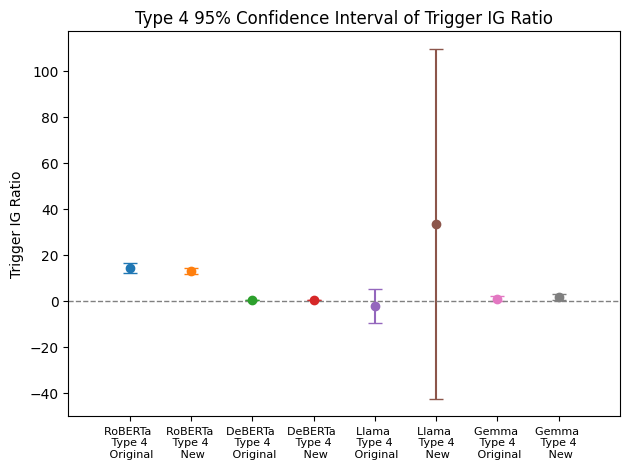

In [42]:
fig, ax = plt.subplots()

i = 1
for model_name in orig_means.keys():
    # Plot mean as a point
    orig_mean = orig_means[model_name]
    orig_ci = orig_cis[model_name]
    new_mean = new_means[model_name]
    new_ci = new_cis[model_name]
    
    ax.errorbar(
        x=i, # x-axis position counter 
        y=orig_means[model_name],
        yerr=[[orig_mean - orig_ci[0]], [orig_ci[1] - orig_mean]],  
        fmt='o',
        capsize=5,
        label=f'{model_name} Type 4 Original Mean ± 95% CI'
    )
    i += 1
    ax.errorbar(
        x=i, 
        y=new_mean,
        yerr=[[new_mean - new_ci[0]], [new_ci[1] - new_mean]],  
        fmt='o',
        capsize=5,
        label=f'{model_name} Type 4 New Mean ± 95% CI'
    )
    i += 1

ax.set_xlim(0, i)
ax.set_xticks([x for x in range(1,i)])
ax.set_xticklabels(xtick_labels, fontsize=8)
ax.set_ylabel('Trigger IG Ratio')
ax.set_title('Type 4 95% Confidence Interval of Trigger IG Ratio')
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)

plt.savefig('Part4B_type4.pdf',format='pdf', bbox_inches='tight')
# ax.legend()

plt.tight_layout()
plt.show()

## Type 5A

In [43]:
orig_means = {}
new_means = {}
orig_cis = {}
new_cis = {}

In [44]:
# RoBERTa
model_name = 'RoBERTa'
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4B_New/{model_name}/part4b_type5a_{model_name.lower()}_results_new.csv', index_col=0)
df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
orig_data = df[df['type'] == 'related']['Trigger IG / Avg. IG']
new_data = df[df['type'] != 'related']['Trigger IG / Avg. IG']
orig_means[model_name], orig_cis[model_name] = get_mean_ci(orig_data)
new_means[model_name], new_cis[model_name] = get_mean_ci(new_data)

In [45]:
model_name = 'DeBERTa'
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4B_New/{model_name}/part4b_type5a_{model_name.lower()}_results_new.csv', index_col=0)
df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
orig_data = df[df['type'] == 'related']['Trigger IG / Avg. IG']
new_data = df[df['type'] != 'related']['Trigger IG / Avg. IG']
orig_means[model_name], orig_cis[model_name] = get_mean_ci(orig_data)
new_means[model_name], new_cis[model_name] = get_mean_ci(new_data)

In [46]:
model_name = 'Llama'
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4B_New/{model_name}/part4b_type5a_{model_name.lower()}_results_new.csv', index_col=0)
df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
orig_data = df[df['type'] == 'related']['Trigger IG / Avg. IG']
new_data = df[df['type'] != 'related']['Trigger IG / Avg. IG']
orig_means[model_name], orig_cis[model_name] = get_mean_ci(orig_data)
new_means[model_name], new_cis[model_name] = get_mean_ci(new_data)

In [47]:
model_name = 'Gemma'
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4B_New/{model_name}/part4b_type5a_{model_name.lower()}_results.csv', index_col=0)
df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
orig_data = df[df['type'] == 'related']['Trigger IG / Avg. IG']
new_data = df[df['type'] != 'related']['Trigger IG / Avg. IG']
orig_means[model_name], orig_cis[model_name] = get_mean_ci(orig_data)
new_means[model_name], new_cis[model_name] = get_mean_ci(new_data)

In [48]:
pd.concat([pd.DataFrame(orig_means,index=['Trigger IG Ratio']),pd.DataFrame(new_means,index=['Trigger IG Ratio'])])

,RoBERTa,DeBERTa,Llama,Gemma
Trigger IG Ratio,10.957565,0.822637,4.295327,-19.953595
Trigger IG Ratio,11.519714,0.848669,6.296237,-6.579469


In [49]:
xtick_labels = []
for model_name in orig_means.keys():
    xtick_labels.extend([f'{model_name} \n Type 5A \n Original', f'{model_name} \n Type 5A \n New'])

In [50]:
orig_means

{'RoBERTa': 10.95756515720416,
 'DeBERTa': 0.8226373953451989,
 'Llama': 4.295326979352028,
 'Gemma': -19.953595058250816}

In [51]:
new_means

{'RoBERTa': 11.519713807368678,
 'DeBERTa': 0.848668718627178,
 'Llama': 6.296236866836329,
 'Gemma': -6.5794694218334655}

In [52]:
orig_cis

{'RoBERTa': (10.3864790341847, 11.528651280223619),
 'DeBERTa': (0.8028503851587372, 0.8424244055316605),
 'Llama': (-2.9317141149083046, 11.52236807361236),
 'Gemma': (-60.09988660902329, 20.19269649252165)}

In [53]:
new_cis

{'RoBERTa': (11.104845188704083, 11.934582426033273),
 'DeBERTa': (0.8360215165606225, 0.8613159206937334),
 'Llama': (-1.7372218099385144, 14.329695543611173),
 'Gemma': (-19.703704792546205, 6.5447659488792755)}

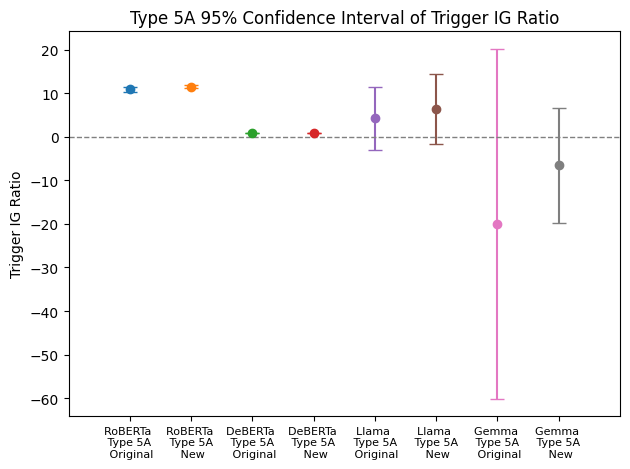

In [54]:
fig, ax = plt.subplots()

i = 1
for model_name in orig_means.keys():
    # Plot mean as a point
    orig_mean = orig_means[model_name]
    orig_ci = orig_cis[model_name]
    new_mean = new_means[model_name]
    new_ci = new_cis[model_name]
    
    ax.errorbar(
        x=i, # x-axis position counter 
        y=orig_means[model_name],
        yerr=[[orig_mean - orig_ci[0]], [orig_ci[1] - orig_mean]],  
        fmt='o',
        capsize=5,
        label=f'{model_name} Type 5A Original Mean ± 95% CI'
    )
    i += 1
    ax.errorbar(
        x=i, 
        y=new_mean,
        yerr=[[new_mean - new_ci[0]], [new_ci[1] - new_mean]],  
        fmt='o',
        capsize=5,
        label=f'{model_name} Type 5A New Mean ± 95% CI'
    )
    i += 1

ax.set_xlim(0, i)
ax.set_xticks([x for x in range(1,i)])
ax.set_xticklabels(xtick_labels, fontsize=8)
ax.set_ylabel('Trigger IG Ratio')
ax.set_title('Type 5A 95% Confidence Interval of Trigger IG Ratio')
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)
# ax.legend()

plt.tight_layout()
plt.savefig('Part4B_type5A.pdf',format='pdf', bbox_inches='tight')
plt.show()

##  Type 5P

In [55]:
orig_means = {}
new_means = {}
orig_cis = {}
new_cis = {}

In [56]:
# RoBERTa
model_name = 'RoBERTa'
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4B_New/{model_name}/part4b_type5p_{model_name.lower()}_results_new.csv', index_col=0)
df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
orig_data = df[df['type'] == 'related']['Trigger IG / Avg. IG']
new_data = df[df['type'] != 'related']['Trigger IG / Avg. IG']
orig_means[model_name], orig_cis[model_name] = get_mean_ci(orig_data)
new_means[model_name], new_cis[model_name] = get_mean_ci(new_data)

In [57]:
model_name = 'DeBERTa'
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4B_New/{model_name}/part4b_type5p_{model_name.lower()}_results_new.csv', index_col=0)
df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
orig_data = df[df['type'] == 'related']['Trigger IG / Avg. IG']
new_data = df[df['type'] != 'related']['Trigger IG / Avg. IG']
orig_means[model_name], orig_cis[model_name] = get_mean_ci(orig_data)
new_means[model_name], new_cis[model_name] = get_mean_ci(new_data)

In [58]:
model_name = 'Llama'
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4B_New/{model_name}/part4b_type5p_{model_name.lower()}_results_new.csv', index_col=0)
df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
orig_data = df[df['type'] == 'related']['Trigger IG / Avg. IG']
new_data = df[df['type'] != 'related']['Trigger IG / Avg. IG']
orig_means[model_name], orig_cis[model_name] = get_mean_ci(orig_data)
new_means[model_name], new_cis[model_name] = get_mean_ci(new_data)

In [59]:
model_name = 'Gemma'
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4B_New/{model_name}/part4b_type5p_{model_name.lower()}_results.csv', index_col=0)
df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
orig_data = df[df['type'] == 'related']['Trigger IG / Avg. IG']
new_data = df[df['type'] != 'related']['Trigger IG / Avg. IG']
orig_means[model_name], orig_cis[model_name] = get_mean_ci(orig_data)
new_means[model_name], new_cis[model_name] = get_mean_ci(new_data)

In [60]:
pd.concat([pd.DataFrame(orig_means,index=['Trigger IG Ratio']),pd.DataFrame(new_means,index=['Trigger IG Ratio'])])

,RoBERTa,DeBERTa,Llama,Gemma
Trigger IG Ratio,12.239851,0.733034,0.820669,2.460646
Trigger IG Ratio,12.603363,0.550724,-0.363044,2.546443


In [61]:
xtick_labels = []
for model_name in orig_means.keys():
    xtick_labels.extend([f'{model_name} \n Type 5P \n Original', f'{model_name} \n Type 5P \n New'])

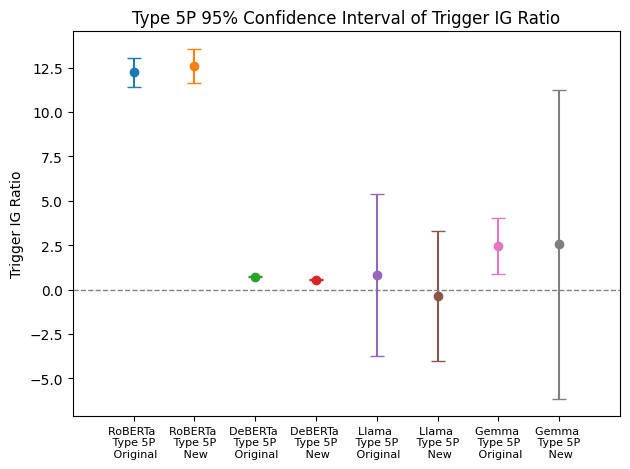

In [62]:
fig, ax = plt.subplots()

i = 1
for model_name in orig_means.keys():
    # Plot mean as a point
    orig_mean = orig_means[model_name]
    orig_ci = orig_cis[model_name]
    new_mean = new_means[model_name]
    new_ci = new_cis[model_name]
    
    ax.errorbar(
        x=i, # x-axis position counter 
        y=orig_means[model_name],
        yerr=[[orig_mean - orig_ci[0]], [orig_ci[1] - orig_mean]],  
        fmt='o',
        capsize=5,
        label=f'{model_name} Type 5P Original Mean ± 95% CI'
    )
    i += 1
    ax.errorbar(
        x=i, 
        y=new_mean,
        yerr=[[new_mean - new_ci[0]], [new_ci[1] - new_mean]],  
        fmt='o',
        capsize=5,
        label=f'{model_name} Type 5P New Mean ± 95% CI'
    )
    i += 1

ax.set_xlim(0, i)
ax.set_xticks([x for x in range(1,i)])
ax.set_xticklabels(xtick_labels, fontsize=8)
ax.set_ylabel('Trigger IG Ratio')
ax.set_title('Type 5P 95% Confidence Interval of Trigger IG Ratio')
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.savefig('Part4B_type5P.pdf',format='pdf', bbox_inches='tight')

plt.tight_layout()
plt.show()